# 1. Import and Install Dependencies

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: attrs>=19.1.0 in c:\users\siva\anaconda3\lib\site-packages (from mediapipe) (21.4.0)



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow==2.5.0


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow-gpu==2.5.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

## 2.Keypoints using MP Holistic

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [11]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

            # Read feed
        ret, frame = cap.read()

            # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image,results)

            # Show to screen
        cv2.imshow('OpenCV Feed', image)

            # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
len(results.pose_landmarks.landmark)

33

In [13]:
draw_landmarks(frame, results)

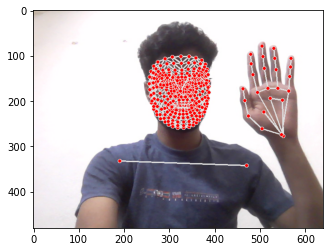

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3.Extract Keypoint Values

In [15]:
results.pose_landmarks

landmark {
  x: 0.5078617
  y: 0.3722753
  z: -1.0545672
  visibility: 0.9999865
}
landmark {
  x: 0.53953135
  y: 0.3017598
  z: -0.9607836
  visibility: 0.99997544
}
landmark {
  x: 0.55776876
  y: 0.3008172
  z: -0.9609172
  visibility: 0.9999774
}
landmark {
  x: 0.57260656
  y: 0.3002222
  z: -0.9601862
  visibility: 0.99997276
}
landmark {
  x: 0.48239928
  y: 0.30914336
  z: -0.9756552
  visibility: 0.9999699
}
landmark {
  x: 0.46325725
  y: 0.31123227
  z: -0.97537106
  visibility: 0.99996734
}
landmark {
  x: 0.4442432
  y: 0.31422812
  z: -0.97588986
  visibility: 0.99995637
}
landmark {
  x: 0.5973884
  y: 0.3374637
  z: -0.4521742
  visibility: 0.9999744
}
landmark {
  x: 0.42809534
  y: 0.3530086
  z: -0.51016897
  visibility: 0.99997944
}
landmark {
  x: 0.54809576
  y: 0.448852
  z: -0.86821395
  visibility: 0.9999787
}
landmark {
  x: 0.47934046
  y: 0.44546753
  z: -0.8874855
  visibility: 0.99998045
}
landmark {
  x: 0.73735106
  y: 0.713063
  z: -0.14067836
  visibi

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose

[array([ 0.50786167,  0.37227529, -1.05456722,  0.99998653]),
 array([ 0.53953135,  0.30175981, -0.9607836 ,  0.99997544]),
 array([ 0.55776876,  0.30081719, -0.96091717,  0.99997741]),
 array([ 0.57260656,  0.30022219, -0.96018618,  0.99997276]),
 array([ 0.48239928,  0.30914336, -0.9756552 ,  0.9999699 ]),
 array([ 0.46325725,  0.31123227, -0.97537106,  0.99996734]),
 array([ 0.44424319,  0.31422812, -0.97588986,  0.99995637]),
 array([ 0.59738839,  0.33746371, -0.45217419,  0.99997443]),
 array([ 0.42809534,  0.3530086 , -0.51016897,  0.99997944]),
 array([ 0.54809576,  0.448852  , -0.86821395,  0.99997872]),
 array([ 0.47934046,  0.44546753, -0.8874855 ,  0.99998045]),
 array([ 0.73735106,  0.713063  , -0.14067836,  0.99918431]),
 array([ 0.2988908 ,  0.69224262, -0.30728504,  0.99543142]),
 array([ 0.97215033,  1.00533223, -0.82223642,  0.96125335]),
 array([ 0.22674546,  1.07375896, -0.43906218,  0.21375252]),
 array([ 0.86312819,  0.5780434 , -1.71208858,  0.99775362]),
 array([

In [18]:
len(results.face_landmarks.landmark)

468

In [19]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:

face

array([ 0.51797771,  0.42954728, -0.02624825, ...,  0.58055747,
        0.31057388,  0.01928086])

In [21]:
lh

array([ 8.56908083e-01,  5.72803736e-01,  3.55660347e-07,  7.89135814e-01,
        5.44597507e-01, -1.93545334e-02,  7.43201196e-01,  4.85623717e-01,
       -2.59175897e-02,  7.30843604e-01,  4.15805548e-01, -3.16930301e-02,
        7.23746896e-01,  3.62263680e-01, -3.62658463e-02,  7.74278164e-01,
        3.77557933e-01, -3.04634008e-03,  7.58075774e-01,  2.96424001e-01,
       -1.56884715e-02,  7.52525747e-01,  2.47524753e-01, -2.82833688e-02,
        7.50579417e-01,  2.02924043e-01, -3.79529670e-02,  8.09707701e-01,
        3.59377027e-01, -6.32476155e-03,  7.97058940e-01,  2.68719614e-01,
       -1.54788876e-02,  7.92459428e-01,  2.12547347e-01, -2.62814090e-02,
        7.89736688e-01,  1.64610714e-01, -3.49333994e-02,  8.44290555e-01,
        3.58992040e-01, -1.39932828e-02,  8.37631464e-01,  2.73891330e-01,
       -2.56425571e-02,  8.34188521e-01,  2.21092880e-01, -3.43690440e-02,
        8.31193149e-01,  1.75274193e-01, -4.11246903e-02,  8.81271005e-01,
        3.72682065e-01, -

In [22]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
result_test=extract_keypoints(results)

In [25]:

result_test

array([ 0.50786167,  0.37227529, -1.05456722, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
result_test.shape

(1662,)

In [27]:
np.save('0', result_test)

In [28]:
np.load('0.npy')

array([ 0.50786167,  0.37227529, -1.05456722, ...,  0.        ,
        0.        ,  0.        ])

# 4.Setup Folders for Collection

In [29]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello',  'Thanks'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [30]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5.Collect Keypoint Values for Training and Testing

In [31]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6.Preprocess Data and Create Labels and Features

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [33]:
label_map = {label:num for num, label in enumerate(actions)}

In [34]:
label_map

{'Hello': 0, 'Thanks': 1}

In [35]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [36]:
np.array(sequences).shape

(60, 30, 1662)

In [37]:
np.array(labels).shape

(60,)

In [38]:
X = np.array(sequences)

In [39]:
X.shape

(60, 30, 1662)

In [40]:
y = to_categorical(labels).astype(int)

In [41]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [43]:
y_test.shape

(3, 2)

# 7.Build and Train LSTM Neural Network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [56]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [47]:
res = [.7, 0.2, 0.1]

In [48]:
actions[np.argmax(res)]

'Hello'

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [50]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
2/2 [==============================] - 7s 1s/step - loss: 0.6619 - categorical_accuracy: 0.5088
Epoch 2/2000
2/2 [==============================] - 0s 62ms/step - loss: 2.6972 - categorical_accuracy: 0.4561
Epoch 3/2000
2/2 [==============================] - 0s 70ms/step - loss: 3.1468 - categorical_accuracy: 0.4912
Epoch 4/2000
2/2 [==============================] - 0s 100ms/step - loss: 18.6827 - categorical_accuracy: 0.5789
Epoch 5/2000
2/2 [==============================] - 0s 68ms/step - loss: 16.4055 - categorical_accuracy: 0.4561
Epoch 6/2000
2/2 [==============================] - 0s 52ms/step - loss: 33.1151 - categorical_accuracy: 0.3684
Epoch 7/2000
2/2 [==============================] - 0s 49ms/step - loss: 27.2425 - categorical_accuracy: 0.4912
Epoch 8/2000
2/2 [==============================] - 0s 49ms/step - loss: 113.1180 - categorical_accuracy: 0.5965
Epoch 9/2000
2/2 [==============================] - 0s 48ms/step - loss: 48.7537 - categorical_accuracy: 0.

2/2 [==============================] - 0s 52ms/step - loss: 12.6325 - categorical_accuracy: 0.5088
Epoch 74/2000
2/2 [==============================] - 0s 57ms/step - loss: 11.4627 - categorical_accuracy: 0.4035
Epoch 75/2000
2/2 [==============================] - 0s 46ms/step - loss: 15.1716 - categorical_accuracy: 0.4912
Epoch 76/2000
2/2 [==============================] - 0s 48ms/step - loss: 18.2453 - categorical_accuracy: 0.5088
Epoch 77/2000
2/2 [==============================] - 0s 43ms/step - loss: 12.8326 - categorical_accuracy: 0.5263
Epoch 78/2000
2/2 [==============================] - 0s 45ms/step - loss: 25.9832 - categorical_accuracy: 0.4912
Epoch 79/2000
2/2 [==============================] - 0s 42ms/step - loss: 16.6447 - categorical_accuracy: 0.5439
Epoch 80/2000
2/2 [==============================] - 0s 43ms/step - loss: 13.1553 - categorical_accuracy: 0.5088
Epoch 81/2000
2/2 [==============================] - 0s 47ms/step - loss: 5.0968 - categorical_accuracy: 0.684

2/2 [==============================] - 0s 43ms/step - loss: 0.0946 - categorical_accuracy: 0.9649
Epoch 146/2000
2/2 [==============================] - ETA: 0s - loss: 0.2144 - categorical_accuracy: 0.87 - 0s 43ms/step - loss: 0.1210 - categorical_accuracy: 0.9298
Epoch 147/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.2417 - categorical_accuracy: 0.9474
Epoch 148/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.1811 - categorical_accuracy: 0.9474
Epoch 149/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.0225 - categorical_accuracy: 1.0000
Epoch 150/2000
2/2 [==============================] - 0s 47ms/step - loss: 0.2628 - categorical_accuracy: 0.8772
Epoch 151/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.1498 - categorical_accuracy: 0.9649
Epoch 152/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.1943 - categorical_accuracy: 0.9649
Epoch 153/2000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 44ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 218/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 219/2000
2/2 [==============================] - 0s 45ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 220/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 221/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 222/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 223/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 224/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 225/2000
2/2 [==============================] - 0s 44ms/step - loss: 0.0012 - categorical_accuracy: 1.000

2/2 [==============================] - 0s 43ms/step - loss: 9.8324e-04 - categorical_accuracy: 1.0000
Epoch 290/2000
2/2 [==============================] - 0s 44ms/step - loss: 9.9203e-04 - categorical_accuracy: 1.0000
Epoch 291/2000
2/2 [==============================] - 0s 53ms/step - loss: 9.8159e-04 - categorical_accuracy: 1.0000
Epoch 292/2000
2/2 [==============================] - 0s 45ms/step - loss: 9.7826e-04 - categorical_accuracy: 1.0000
Epoch 293/2000
2/2 [==============================] - 0s 45ms/step - loss: 9.8459e-04 - categorical_accuracy: 1.0000
Epoch 294/2000
2/2 [==============================] - 0s 43ms/step - loss: 9.8435e-04 - categorical_accuracy: 1.0000
Epoch 295/2000
2/2 [==============================] - 0s 51ms/step - loss: 9.8958e-04 - categorical_accuracy: 1.0000
Epoch 296/2000
2/2 [==============================] - 0s 45ms/step - loss: 9.7200e-04 - categorical_accuracy: 1.0000
Epoch 297/2000
2/2 [==============================] - 0s 50ms/step - loss: 9.68

2/2 [==============================] - 0s 43ms/step - loss: 8.6274e-04 - categorical_accuracy: 1.0000
Epoch 360/2000
2/2 [==============================] - 0s 45ms/step - loss: 8.5682e-04 - categorical_accuracy: 1.0000
Epoch 361/2000
2/2 [==============================] - 0s 41ms/step - loss: 8.8211e-04 - categorical_accuracy: 1.0000
Epoch 362/2000
2/2 [==============================] - 0s 45ms/step - loss: 8.7216e-04 - categorical_accuracy: 1.0000
Epoch 363/2000
2/2 [==============================] - 0s 46ms/step - loss: 8.6516e-04 - categorical_accuracy: 1.0000
Epoch 364/2000
2/2 [==============================] - 0s 46ms/step - loss: 8.5394e-04 - categorical_accuracy: 1.0000
Epoch 365/2000
2/2 [==============================] - 0s 45ms/step - loss: 8.5055e-04 - categorical_accuracy: 1.0000
Epoch 366/2000
2/2 [==============================] - 0s 43ms/step - loss: 8.6882e-04 - categorical_accuracy: 1.0000
Epoch 367/2000
2/2 [==============================] - 0s 43ms/step - loss: 8.49

2/2 [==============================] - 0s 41ms/step - loss: 6.9628e-04 - categorical_accuracy: 1.0000
Epoch 430/2000
2/2 [==============================] - 0s 44ms/step - loss: 6.9699e-04 - categorical_accuracy: 1.0000
Epoch 431/2000
2/2 [==============================] - 0s 47ms/step - loss: 6.9013e-04 - categorical_accuracy: 1.0000
Epoch 432/2000
2/2 [==============================] - 0s 42ms/step - loss: 6.8968e-04 - categorical_accuracy: 1.0000
Epoch 433/2000
2/2 [==============================] - 0s 42ms/step - loss: 6.8527e-04 - categorical_accuracy: 1.0000
Epoch 434/2000
2/2 [==============================] - 0s 43ms/step - loss: 6.8025e-04 - categorical_accuracy: 1.0000
Epoch 435/2000
2/2 [==============================] - 0s 44ms/step - loss: 6.8043e-04 - categorical_accuracy: 1.0000
Epoch 436/2000
2/2 [==============================] - 0s 43ms/step - loss: 6.7641e-04 - categorical_accuracy: 1.0000
Epoch 437/2000
2/2 [==============================] - 0s 43ms/step - loss: 6.82

2/2 [==============================] - 0s 44ms/step - loss: 8.7677e-04 - categorical_accuracy: 1.0000
Epoch 501/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 502/2000
2/2 [==============================] - 0s 44ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 503/2000
2/2 [==============================] - 0s 44ms/step - loss: 8.9032e-04 - categorical_accuracy: 1.0000
Epoch 504/2000
2/2 [==============================] - 0s 41ms/step - loss: 9.2185e-04 - categorical_accuracy: 1.0000
Epoch 505/2000
2/2 [==============================] - 0s 43ms/step - loss: 8.9693e-04 - categorical_accuracy: 1.0000
Epoch 506/2000
2/2 [==============================] - 0s 45ms/step - loss: 8.3214e-04 - categorical_accuracy: 1.0000
Epoch 507/2000
2/2 [==============================] - 0s 49ms/step - loss: 7.9257e-04 - categorical_accuracy: 1.0000
Epoch 508/2000
2/2 [==============================] - 0s 48ms/step - loss: 7.9647e-04 -

2/2 [==============================] - 0s 45ms/step - loss: 4.1871e-04 - categorical_accuracy: 1.0000
Epoch 571/2000
2/2 [==============================] - 0s 40ms/step - loss: 4.1618e-04 - categorical_accuracy: 1.0000
Epoch 572/2000
2/2 [==============================] - 0s 40ms/step - loss: 4.1436e-04 - categorical_accuracy: 1.0000
Epoch 573/2000
2/2 [==============================] - 0s 41ms/step - loss: 4.1278e-04 - categorical_accuracy: 1.0000
Epoch 574/2000
2/2 [==============================] - 0s 40ms/step - loss: 4.0874e-04 - categorical_accuracy: 1.0000
Epoch 575/2000
2/2 [==============================] - 0s 42ms/step - loss: 4.0792e-04 - categorical_accuracy: 1.0000
Epoch 576/2000
2/2 [==============================] - 0s 41ms/step - loss: 4.0551e-04 - categorical_accuracy: 1.0000
Epoch 577/2000
2/2 [==============================] - 0s 41ms/step - loss: 4.0268e-04 - categorical_accuracy: 1.0000
Epoch 578/2000
2/2 [==============================] - 0s 44ms/step - loss: 4.04

2/2 [==============================] - 0s 66ms/step - loss: 2.8903e-04 - categorical_accuracy: 1.0000
Epoch 641/2000
2/2 [==============================] - 0s 46ms/step - loss: 2.8788e-04 - categorical_accuracy: 1.0000
Epoch 642/2000
2/2 [==============================] - 0s 43ms/step - loss: 2.8858e-04 - categorical_accuracy: 1.0000
Epoch 643/2000
2/2 [==============================] - 0s 43ms/step - loss: 2.8871e-04 - categorical_accuracy: 1.0000
Epoch 644/2000
2/2 [==============================] - 0s 53ms/step - loss: 2.9009e-04 - categorical_accuracy: 1.0000
Epoch 645/2000
2/2 [==============================] - 0s 44ms/step - loss: 2.9153e-04 - categorical_accuracy: 1.0000
Epoch 646/2000
2/2 [==============================] - 0s 43ms/step - loss: 2.8705e-04 - categorical_accuracy: 1.0000
Epoch 647/2000
2/2 [==============================] - 0s 44ms/step - loss: 2.8386e-04 - categorical_accuracy: 1.0000
Epoch 648/2000
2/2 [==============================] - 0s 45ms/step - loss: 2.80

2/2 [==============================] - 0s 65ms/step - loss: 2.0801e-04 - categorical_accuracy: 1.0000
Epoch 711/2000
2/2 [==============================] - 0s 52ms/step - loss: 2.0762e-04 - categorical_accuracy: 1.0000
Epoch 712/2000
2/2 [==============================] - 0s 57ms/step - loss: 2.0663e-04 - categorical_accuracy: 1.0000
Epoch 713/2000
2/2 [==============================] - 0s 67ms/step - loss: 2.0610e-04 - categorical_accuracy: 1.0000
Epoch 714/2000
2/2 [==============================] - 0s 52ms/step - loss: 2.0564e-04 - categorical_accuracy: 1.0000
Epoch 715/2000
2/2 [==============================] - 0s 51ms/step - loss: 2.0531e-04 - categorical_accuracy: 1.0000
Epoch 716/2000
2/2 [==============================] - 0s 67ms/step - loss: 2.0403e-04 - categorical_accuracy: 1.0000
Epoch 717/2000
2/2 [==============================] - 0s 67ms/step - loss: 2.0348e-04 - categorical_accuracy: 1.0000
Epoch 718/2000
2/2 [==============================] - 0s 50ms/step - loss: 2.02

2/2 [==============================] - 0s 50ms/step - loss: 1.7224e-04 - categorical_accuracy: 1.0000
Epoch 781/2000
2/2 [==============================] - 0s 59ms/step - loss: 1.7190e-04 - categorical_accuracy: 1.0000
Epoch 782/2000
2/2 [==============================] - 0s 67ms/step - loss: 1.7098e-04 - categorical_accuracy: 1.0000
Epoch 783/2000
2/2 [==============================] - 0s 65ms/step - loss: 1.7088e-04 - categorical_accuracy: 1.0000
Epoch 784/2000
2/2 [==============================] - 0s 54ms/step - loss: 1.7015e-04 - categorical_accuracy: 1.0000
Epoch 785/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.6930e-04 - categorical_accuracy: 1.0000
Epoch 786/2000
2/2 [==============================] - 0s 62ms/step - loss: 1.7001e-04 - categorical_accuracy: 1.0000
Epoch 787/2000
2/2 [==============================] - 0s 82ms/step - loss: 1.6823e-04 - categorical_accuracy: 1.0000
Epoch 788/2000
2/2 [==============================] - 0s 64ms/step - loss: 1.68

2/2 [==============================] - 0s 53ms/step - loss: 1.4841e-04 - categorical_accuracy: 1.0000
Epoch 851/2000
2/2 [==============================] - 0s 57ms/step - loss: 1.4763e-04 - categorical_accuracy: 1.0000
Epoch 852/2000
2/2 [==============================] - 0s 62ms/step - loss: 1.4671e-04 - categorical_accuracy: 1.0000
Epoch 853/2000
2/2 [==============================] - 0s 64ms/step - loss: 1.4640e-04 - categorical_accuracy: 1.0000
Epoch 854/2000
2/2 [==============================] - 0s 63ms/step - loss: 1.4732e-04 - categorical_accuracy: 1.0000
Epoch 855/2000
2/2 [==============================] - 0s 62ms/step - loss: 1.4584e-04 - categorical_accuracy: 1.0000
Epoch 856/2000
2/2 [==============================] - 0s 68ms/step - loss: 1.4493e-04 - categorical_accuracy: 1.0000
Epoch 857/2000
2/2 [==============================] - 0s 68ms/step - loss: 1.4622e-04 - categorical_accuracy: 1.0000
Epoch 858/2000
2/2 [==============================] - 0s 66ms/step - loss: 1.45

2/2 [==============================] - 0s 53ms/step - loss: 1.2603e-04 - categorical_accuracy: 1.0000
Epoch 921/2000
2/2 [==============================] - 0s 64ms/step - loss: 1.2598e-04 - categorical_accuracy: 1.0000
Epoch 922/2000
2/2 [==============================] - 0s 54ms/step - loss: 1.2543e-04 - categorical_accuracy: 1.0000
Epoch 923/2000
2/2 [==============================] - 0s 51ms/step - loss: 1.2533e-04 - categorical_accuracy: 1.0000
Epoch 924/2000
2/2 [==============================] - 0s 53ms/step - loss: 1.2562e-04 - categorical_accuracy: 1.0000
Epoch 925/2000
2/2 [==============================] - 0s 81ms/step - loss: 1.2481e-04 - categorical_accuracy: 1.0000
Epoch 926/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.2447e-04 - categorical_accuracy: 1.0000
Epoch 927/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.2409e-04 - categorical_accuracy: 1.0000
Epoch 928/2000
2/2 [==============================] - 0s 54ms/step - loss: 1.24

2/2 [==============================] - 0s 51ms/step - loss: 1.1090e-04 - categorical_accuracy: 1.0000
Epoch 991/2000
2/2 [==============================] - 0s 70ms/step - loss: 1.1065e-04 - categorical_accuracy: 1.0000
Epoch 992/2000
2/2 [==============================] - 0s 71ms/step - loss: 1.1048e-04 - categorical_accuracy: 1.0000
Epoch 993/2000
2/2 [==============================] - 0s 58ms/step - loss: 1.1038e-04 - categorical_accuracy: 1.0000
Epoch 994/2000
2/2 [==============================] - 0s 64ms/step - loss: 1.1018e-04 - categorical_accuracy: 1.0000
Epoch 995/2000
2/2 [==============================] - 0s 72ms/step - loss: 1.1047e-04 - categorical_accuracy: 1.0000
Epoch 996/2000
2/2 [==============================] - 0s 66ms/step - loss: 1.1022e-04 - categorical_accuracy: 1.0000
Epoch 997/2000
2/2 [==============================] - 0s 66ms/step - loss: 1.0999e-04 - categorical_accuracy: 1.0000
Epoch 998/2000
2/2 [==============================] - 0s 48ms/step - loss: 1.09

2/2 [==============================] - 0s 62ms/step - loss: 1.0190e-04 - categorical_accuracy: 1.0000
Epoch 1060/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.0188e-04 - categorical_accuracy: 1.0000
Epoch 1061/2000
2/2 [==============================] - 0s 67ms/step - loss: 1.0201e-04 - categorical_accuracy: 1.0000
Epoch 1062/2000
2/2 [==============================] - 0s 59ms/step - loss: 1.0167e-04 - categorical_accuracy: 1.0000
Epoch 1063/2000
2/2 [==============================] - 0s 61ms/step - loss: 1.0160e-04 - categorical_accuracy: 1.0000
Epoch 1064/2000
2/2 [==============================] - 0s 67ms/step - loss: 1.0146e-04 - categorical_accuracy: 1.0000
Epoch 1065/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.0140e-04 - categorical_accuracy: 1.0000
Epoch 1066/2000
2/2 [==============================] - 0s 49ms/step - loss: 1.0154e-04 - categorical_accuracy: 1.0000
Epoch 1067/2000
2/2 [==============================] - 0s 66ms/step - lo

2/2 [==============================] - 0s 66ms/step - loss: 9.5496e-05 - categorical_accuracy: 1.0000
Epoch 1129/2000
2/2 [==============================] - 0s 53ms/step - loss: 9.5430e-05 - categorical_accuracy: 1.0000
Epoch 1130/2000
2/2 [==============================] - 0s 55ms/step - loss: 9.5624e-05 - categorical_accuracy: 1.0000
Epoch 1131/2000
2/2 [==============================] - 0s 65ms/step - loss: 9.5346e-05 - categorical_accuracy: 1.0000
Epoch 1132/2000
2/2 [==============================] - 0s 53ms/step - loss: 9.5341e-05 - categorical_accuracy: 1.0000
Epoch 1133/2000
2/2 [==============================] - 0s 55ms/step - loss: 9.5325e-05 - categorical_accuracy: 1.0000
Epoch 1134/2000
2/2 [==============================] - 0s 64ms/step - loss: 9.5126e-05 - categorical_accuracy: 1.0000
Epoch 1135/2000
2/2 [==============================] - 0s 55ms/step - loss: 9.5061e-05 - categorical_accuracy: 1.0000
Epoch 1136/2000
2/2 [==============================] - 0s 53ms/step - lo

2/2 [==============================] - 0s 68ms/step - loss: 9.0849e-05 - categorical_accuracy: 1.0000
Epoch 1198/2000
2/2 [==============================] - 0s 49ms/step - loss: 9.0545e-05 - categorical_accuracy: 1.0000
Epoch 1199/2000
2/2 [==============================] - 0s 63ms/step - loss: 9.0485e-05 - categorical_accuracy: 1.0000
Epoch 1200/2000
2/2 [==============================] - 0s 63ms/step - loss: 9.0851e-05 - categorical_accuracy: 1.0000
Epoch 1201/2000
2/2 [==============================] - 0s 52ms/step - loss: 9.0149e-05 - categorical_accuracy: 1.0000
Epoch 1202/2000
2/2 [==============================] - 0s 48ms/step - loss: 9.0105e-05 - categorical_accuracy: 1.0000
Epoch 1203/2000
2/2 [==============================] - 0s 56ms/step - loss: 9.0097e-05 - categorical_accuracy: 1.0000
Epoch 1204/2000
2/2 [==============================] - 0s 51ms/step - loss: 9.0315e-05 - categorical_accuracy: 1.0000
Epoch 1205/2000
2/2 [==============================] - 0s 48ms/step - lo

2/2 [==============================] - 0s 50ms/step - loss: 8.6043e-05 - categorical_accuracy: 1.0000
Epoch 1267/2000
2/2 [==============================] - 0s 50ms/step - loss: 8.5928e-05 - categorical_accuracy: 1.0000
Epoch 1268/2000
2/2 [==============================] - 0s 60ms/step - loss: 8.5908e-05 - categorical_accuracy: 1.0000
Epoch 1269/2000
2/2 [==============================] - 0s 56ms/step - loss: 8.5789e-05 - categorical_accuracy: 1.0000
Epoch 1270/2000
2/2 [==============================] - 0s 67ms/step - loss: 8.5827e-05 - categorical_accuracy: 1.0000
Epoch 1271/2000
2/2 [==============================] - 0s 55ms/step - loss: 8.5867e-05 - categorical_accuracy: 1.0000
Epoch 1272/2000
2/2 [==============================] - 0s 54ms/step - loss: 8.5603e-05 - categorical_accuracy: 1.0000
Epoch 1273/2000
2/2 [==============================] - 0s 53ms/step - loss: 8.5610e-05 - categorical_accuracy: 1.0000
Epoch 1274/2000
2/2 [==============================] - 0s 51ms/step - lo

2/2 [==============================] - 0s 59ms/step - loss: 8.1837e-05 - categorical_accuracy: 1.0000
Epoch 1336/2000
2/2 [==============================] - 0s 50ms/step - loss: 8.2125e-05 - categorical_accuracy: 1.0000
Epoch 1337/2000
2/2 [==============================] - 0s 65ms/step - loss: 8.2081e-05 - categorical_accuracy: 1.0000
Epoch 1338/2000
2/2 [==============================] - 0s 58ms/step - loss: 8.1790e-05 - categorical_accuracy: 1.0000
Epoch 1339/2000
2/2 [==============================] - 0s 50ms/step - loss: 8.1621e-05 - categorical_accuracy: 1.0000
Epoch 1340/2000
2/2 [==============================] - 0s 55ms/step - loss: 8.2075e-05 - categorical_accuracy: 1.0000
Epoch 1341/2000
2/2 [==============================] - 0s 52ms/step - loss: 8.1617e-05 - categorical_accuracy: 1.0000
Epoch 1342/2000
2/2 [==============================] - 0s 60ms/step - loss: 8.1496e-05 - categorical_accuracy: 1.0000
Epoch 1343/2000
2/2 [==============================] - 0s 50ms/step - lo

2/2 [==============================] - 0s 57ms/step - loss: 7.8016e-05 - categorical_accuracy: 1.0000
Epoch 1405/2000
2/2 [==============================] - 0s 67ms/step - loss: 7.7949e-05 - categorical_accuracy: 1.0000
Epoch 1406/2000
2/2 [==============================] - 0s 51ms/step - loss: 7.8365e-05 - categorical_accuracy: 1.0000
Epoch 1407/2000
2/2 [==============================] - 0s 67ms/step - loss: 7.7828e-05 - categorical_accuracy: 1.0000
Epoch 1408/2000
2/2 [==============================] - 0s 67ms/step - loss: 7.7765e-05 - categorical_accuracy: 1.0000
Epoch 1409/2000
2/2 [==============================] - 0s 69ms/step - loss: 7.7761e-05 - categorical_accuracy: 1.0000
Epoch 1410/2000
2/2 [==============================] - 0s 50ms/step - loss: 7.7694e-05 - categorical_accuracy: 1.0000
Epoch 1411/2000
2/2 [==============================] - 0s 65ms/step - loss: 7.7893e-05 - categorical_accuracy: 1.0000
Epoch 1412/2000
2/2 [==============================] - 0s 60ms/step - lo

2/2 [==============================] - 0s 50ms/step - loss: 7.4369e-05 - categorical_accuracy: 1.0000
Epoch 1474/2000
2/2 [==============================] - 0s 50ms/step - loss: 7.4396e-05 - categorical_accuracy: 1.0000
Epoch 1475/2000
2/2 [==============================] - 0s 60ms/step - loss: 7.4220e-05 - categorical_accuracy: 1.0000
Epoch 1476/2000
2/2 [==============================] - 0s 51ms/step - loss: 7.4189e-05 - categorical_accuracy: 1.0000
Epoch 1477/2000
2/2 [==============================] - 0s 53ms/step - loss: 7.4245e-05 - categorical_accuracy: 1.0000
Epoch 1478/2000
2/2 [==============================] - 0s 52ms/step - loss: 7.4044e-05 - categorical_accuracy: 1.0000
Epoch 1479/2000
2/2 [==============================] - 0s 58ms/step - loss: 7.4002e-05 - categorical_accuracy: 1.0000
Epoch 1480/2000
2/2 [==============================] - 0s 67ms/step - loss: 7.3950e-05 - categorical_accuracy: 1.0000
Epoch 1481/2000
2/2 [==============================] - 0s 55ms/step - lo

2/2 [==============================] - 0s 67ms/step - loss: 7.1142e-05 - categorical_accuracy: 1.0000
Epoch 1543/2000
2/2 [==============================] - 0s 53ms/step - loss: 7.0918e-05 - categorical_accuracy: 1.0000
Epoch 1544/2000
2/2 [==============================] - 0s 53ms/step - loss: 7.0828e-05 - categorical_accuracy: 1.0000
Epoch 1545/2000
2/2 [==============================] - 0s 54ms/step - loss: 7.0795e-05 - categorical_accuracy: 1.0000
Epoch 1546/2000
2/2 [==============================] - 0s 59ms/step - loss: 7.1048e-05 - categorical_accuracy: 1.0000
Epoch 1547/2000
2/2 [==============================] - 0s 60ms/step - loss: 7.0749e-05 - categorical_accuracy: 1.0000
Epoch 1548/2000
2/2 [==============================] - 0s 65ms/step - loss: 7.0776e-05 - categorical_accuracy: 1.0000
Epoch 1549/2000
2/2 [==============================] - 0s 65ms/step - loss: 7.0617e-05 - categorical_accuracy: 1.0000
Epoch 1550/2000
2/2 [==============================] - 0s 64ms/step - lo

2/2 [==============================] - 0s 54ms/step - loss: 6.7656e-05 - categorical_accuracy: 1.0000
Epoch 1612/2000
2/2 [==============================] - 0s 61ms/step - loss: 6.7643e-05 - categorical_accuracy: 1.0000
Epoch 1613/2000
2/2 [==============================] - 0s 66ms/step - loss: 6.7678e-05 - categorical_accuracy: 1.0000
Epoch 1614/2000
2/2 [==============================] - 0s 54ms/step - loss: 6.7576e-05 - categorical_accuracy: 1.0000
Epoch 1615/2000
2/2 [==============================] - 0s 63ms/step - loss: 6.7542e-05 - categorical_accuracy: 1.0000
Epoch 1616/2000
2/2 [==============================] - 0s 59ms/step - loss: 6.7527e-05 - categorical_accuracy: 1.0000
Epoch 1617/2000
2/2 [==============================] - 0s 59ms/step - loss: 6.7515e-05 - categorical_accuracy: 1.0000
Epoch 1618/2000
2/2 [==============================] - 0s 60ms/step - loss: 6.7570e-05 - categorical_accuracy: 1.0000
Epoch 1619/2000
2/2 [==============================] - 0s 60ms/step - lo

2/2 [==============================] - 0s 50ms/step - loss: 6.4822e-05 - categorical_accuracy: 1.0000
Epoch 1681/2000
2/2 [==============================] - 0s 51ms/step - loss: 6.4846e-05 - categorical_accuracy: 1.0000
Epoch 1682/2000
2/2 [==============================] - 0s 57ms/step - loss: 6.4572e-05 - categorical_accuracy: 1.0000
Epoch 1683/2000
2/2 [==============================] - 0s 57ms/step - loss: 6.4457e-05 - categorical_accuracy: 1.0000
Epoch 1684/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.4453e-05 - categorical_accuracy: 1.0000
Epoch 1685/2000
2/2 [==============================] - 0s 50ms/step - loss: 6.4400e-05 - categorical_accuracy: 1.0000
Epoch 1686/2000
2/2 [==============================] - 0s 62ms/step - loss: 6.4507e-05 - categorical_accuracy: 1.0000
Epoch 1687/2000
2/2 [==============================] - 0s 60ms/step - loss: 6.4302e-05 - categorical_accuracy: 1.0000
Epoch 1688/2000
2/2 [==============================] - 0s 66ms/step - lo

2/2 [==============================] - 0s 56ms/step - loss: 6.1900e-05 - categorical_accuracy: 1.0000
Epoch 1750/2000
2/2 [==============================] - 0s 56ms/step - loss: 6.1687e-05 - categorical_accuracy: 1.0000
Epoch 1751/2000
2/2 [==============================] - 0s 59ms/step - loss: 6.1693e-05 - categorical_accuracy: 1.0000
Epoch 1752/2000
2/2 [==============================] - 0s 61ms/step - loss: 6.1658e-05 - categorical_accuracy: 1.0000
Epoch 1753/2000
2/2 [==============================] - 0s 66ms/step - loss: 6.1779e-05 - categorical_accuracy: 1.0000
Epoch 1754/2000
2/2 [==============================] - 0s 52ms/step - loss: 6.1541e-05 - categorical_accuracy: 1.0000
Epoch 1755/2000
2/2 [==============================] - 0s 56ms/step - loss: 6.1589e-05 - categorical_accuracy: 1.0000
Epoch 1756/2000
2/2 [==============================] - 0s 68ms/step - loss: 6.1520e-05 - categorical_accuracy: 1.0000
Epoch 1757/2000
2/2 [==============================] - 0s 50ms/step - lo

2/2 [==============================] - 0s 66ms/step - loss: 5.8986e-05 - categorical_accuracy: 1.0000
Epoch 1819/2000
2/2 [==============================] - 0s 52ms/step - loss: 5.8940e-05 - categorical_accuracy: 1.0000
Epoch 1820/2000
2/2 [==============================] - 0s 50ms/step - loss: 5.9009e-05 - categorical_accuracy: 1.0000
Epoch 1821/2000
2/2 [==============================] - 0s 51ms/step - loss: 5.9017e-05 - categorical_accuracy: 1.0000
Epoch 1822/2000
2/2 [==============================] - 0s 51ms/step - loss: 5.8815e-05 - categorical_accuracy: 1.0000
Epoch 1823/2000
2/2 [==============================] - 0s 66ms/step - loss: 5.8917e-05 - categorical_accuracy: 1.0000
Epoch 1824/2000
2/2 [==============================] - 0s 51ms/step - loss: 5.8775e-05 - categorical_accuracy: 1.0000
Epoch 1825/2000
2/2 [==============================] - 0s 50ms/step - loss: 5.8752e-05 - categorical_accuracy: 1.0000
Epoch 1826/2000
2/2 [==============================] - 0s 56ms/step - lo

2/2 [==============================] - 0s 70ms/step - loss: 5.6431e-05 - categorical_accuracy: 1.0000
Epoch 1888/2000
2/2 [==============================] - 0s 47ms/step - loss: 5.6314e-05 - categorical_accuracy: 1.0000
Epoch 1889/2000
2/2 [==============================] - 0s 53ms/step - loss: 5.6467e-05 - categorical_accuracy: 1.0000
Epoch 1890/2000
2/2 [==============================] - 0s 70ms/step - loss: 5.6532e-05 - categorical_accuracy: 1.0000
Epoch 1891/2000
2/2 [==============================] - 0s 66ms/step - loss: 5.6270e-05 - categorical_accuracy: 1.0000
Epoch 1892/2000
2/2 [==============================] - 0s 66ms/step - loss: 5.6180e-05 - categorical_accuracy: 1.0000
Epoch 1893/2000
2/2 [==============================] - 0s 69ms/step - loss: 5.6153e-05 - categorical_accuracy: 1.0000
Epoch 1894/2000
2/2 [==============================] - 0s 52ms/step - loss: 5.6111e-05 - categorical_accuracy: 1.0000
Epoch 1895/2000
2/2 [==============================] - 0s 62ms/step - lo

2/2 [==============================] - 0s 62ms/step - loss: 5.4045e-05 - categorical_accuracy: 1.0000
Epoch 1957/2000
2/2 [==============================] - 0s 62ms/step - loss: 5.4018e-05 - categorical_accuracy: 1.0000
Epoch 1958/2000
2/2 [==============================] - 0s 59ms/step - loss: 5.3989e-05 - categorical_accuracy: 1.0000
Epoch 1959/2000
2/2 [==============================] - 0s 67ms/step - loss: 5.3753e-05 - categorical_accuracy: 1.0000
Epoch 1960/2000
2/2 [==============================] - 0s 49ms/step - loss: 5.3849e-05 - categorical_accuracy: 1.0000
Epoch 1961/2000
2/2 [==============================] - 0s 65ms/step - loss: 5.3891e-05 - categorical_accuracy: 1.0000
Epoch 1962/2000
2/2 [==============================] - 0s 47ms/step - loss: 5.3860e-05 - categorical_accuracy: 1.0000
Epoch 1963/2000
2/2 [==============================] - 0s 60ms/step - loss: 5.3996e-05 - categorical_accuracy: 1.0000
Epoch 1964/2000
2/2 [==============================] - 0s 50ms/step - lo

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 596,642
Trainable params: 596,642
Non-trainable params: 0
________________________________________________

# 8.Make Predictions

In [51]:
res = model.predict(X_test)

In [52]:
actions[np.argmax(res[2])]

'Thanks'

In [53]:
actions[np.argmax(y_test[2])]


'Thanks'

# 9.Save Weights

In [54]:
model.save('action.h5')

In [55]:
del model

In [58]:
model.load_weights('action.h5')

# 10.Evaluation using Confusion Matrix and Accuracy

In [59]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [60]:
yhat = model.predict(X_test)

In [61]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [62]:
 ytrue

[0, 0, 1]

In [63]:
yhat

[0, 0, 1]

In [64]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 2]],

       [[2, 0],
        [0, 1]]], dtype=int64)

In [65]:
accuracy_score(ytrue, yhat)

1.0

# 11.Test in Real Time

In [66]:
from scipy import stats

In [67]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

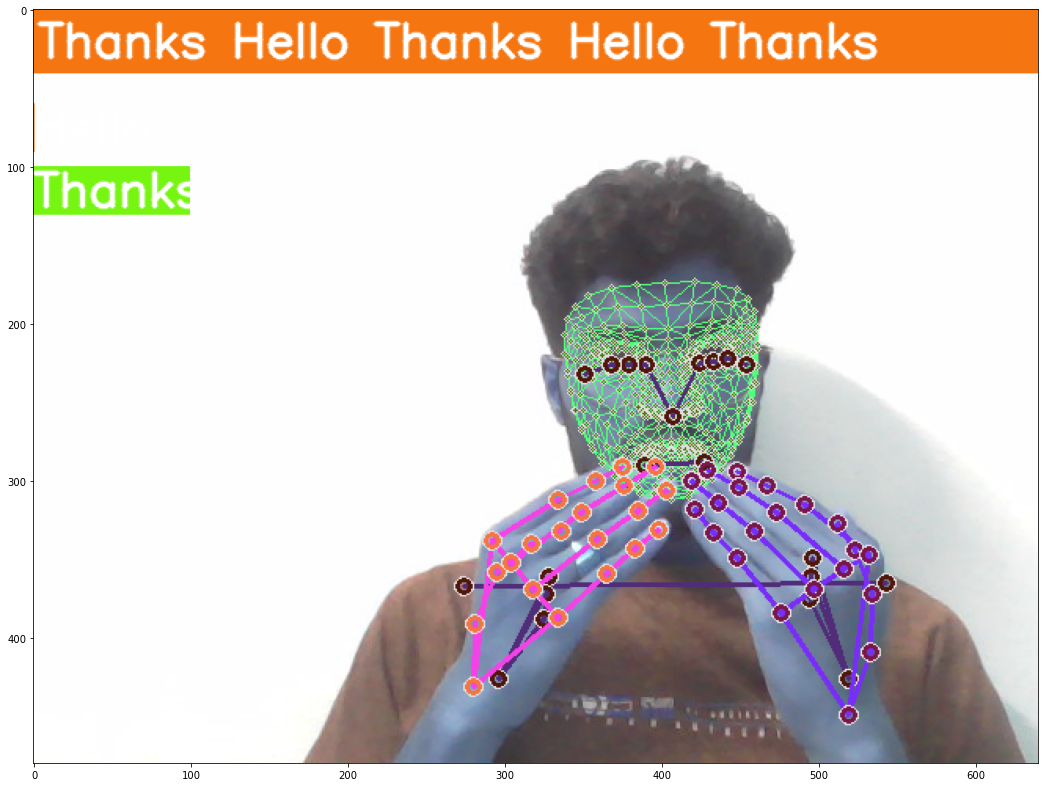

In [70]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [69]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.Sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Thanks
<class 'mediapipe.python.solution